# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.
* The company wishes to clarify whether there is any increase in sales afte stepping into digital marketing.
* The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data set in to python envirinment 
data= pd.read_csv("Sales_add.csv")

In [3]:
#first five rows of dataset
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
#Last five rows of dataset
data.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [5]:
#shape of the dataset
data.shape

(22, 5)

In [6]:
#columns present in the dataset
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [7]:
#A concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [8]:
# Checking null values
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

There is no null value present in the dataset

In [9]:
# Getting descriptive statistics summary
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [10]:
data.skew()

Sales_before_digital_add(in $)    0.578033
Sales_After_digital_add(in $)    -0.022669
dtype: float64

In [11]:
data.corr()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Sales_before_digital_add(in $),1.000000,-0.178668
Sales_After_digital_add(in $),-0.178668,1.000000


## 1. The company wishes to clarify whether there is any increase in sales afte stepping into digital marketing 

Test for hypothesis is there is any increase in sales afte stepping into digital marketing.
  *  Null hypothesis(H0)- There is no increase in sales afte stepping into digital marketing.
  *  Alternative hypothesis(H1)-There is  an increase in sales afte stepping into digital marketing.

significance level as alpha =0.05
* if p value <0.05,we reject null hypothesis and accept Alternative hypothesis.
* if p value >0.05, we can accept null hypothesis and reject Alternative hypothesis.

In [12]:
 d1=data[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].describe()
d1


,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


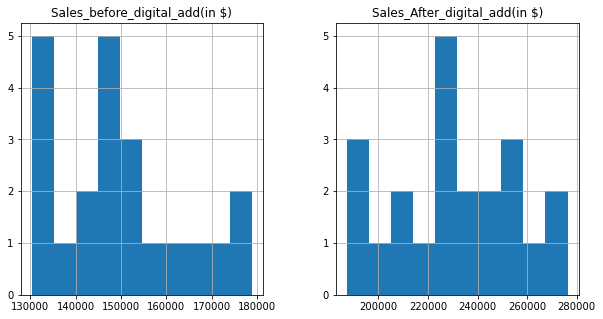

In [13]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(10,5))
plt.show()

INSIGHTS:
* This histograms shows that there is an increase in sales when switching in to digital add.
* Sales before digital marketing ranges between 130000 to 180000.
* Sales after digital marketing ranges between 130000 to 280000


In [32]:
#calculating p -value using t-test-paired t-test-METHOD 1
from scipy import stats
ttest,pvalue=stats.ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],alternative="less")
print(pvalue)
print("p value:",round(pvalue))
# comparing p-value with significant level 0.05
if pvalue<0.05:
    print("Reject null hypothesis-i.e,There is an increase in sales afte stepping into digital marketing.")
else:
    print("Accept null hypothesis-i.e,There is no increase in sales afte stepping into digital marketing.")



3.168333502287889e-11
p value: 0
Reject null hypothesis-i.e,There is an increase in sales afte stepping into digital marketing.


In [34]:
#Calculating p- value using z test-METHOD-2
from statsmodels.stats import weightstats as stests
ztest,pvalue=stests.ztest(data['Sales_before_digital_add(in $)'],x2=None,value=156)
print(pvalue)
# comparing p value with significant level 0.05
if pvalue<0.05:
    print("Reject null hypothesis-i.e,There is an increase in sales afte stepping into digital marketing.")
else:
    print("Accept null hypothesis-i.e,There is no increase in sales afte stepping into digital marketing.")


0.0
Reject null hypothesis-i.e,There is an increase in sales afte stepping into digital marketing.


INSIGHTS:
* p value is less than 0.05 so we can reject null hypothesis.
* From this testing we can concluded that there is a increase in sales after switching in to digital marketing.

## 2.The company needs to check whether there is any dependency between the features “Region” and “Manager.

Test for hypothesis there is any dependency between the features “Region” and “Manager.
* Null hypothesis(H0)-Region and Manager are independent
* Alternative hypothesis(H1)-Region and Manager are dependent.
*  Checking chi-squared independency between region and manager

In [15]:
data['Manager'].unique()


array(['Manager - A', 'Manager - C', 'Manager - B'], dtype=object)

In [16]:
data['Region'].unique()

array(['Region - A', 'Region - B', 'Region - C'], dtype=object)

In [17]:
#Defining a dictionary
Managernumber={'Manager - A':1, 'Manager - B':2, 'Manager - C':3}
regionnumber={'Region - A':1, 'Region - B':2, 'Region - C':3}

In [18]:
man_num=[Managernumber[values] for values in data.Manager]
man_num

[1, 3, 1, 2, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 3]

In [19]:
reg_num=[regionnumber[value] for value in data.Region]
reg_num

[1, 1, 2, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1]

In [20]:
# Using 'man_num' and 'reg_num' as the column name and equating in to the list
data['man_num']=man_num
data['reg_num']=reg_num

In [21]:
#display first five rows
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),man_num,reg_num
0,Month-1,Region - A,Manager - A,132921,270390,1,1
1,Month-2,Region - A,Manager - C,149559,223334,3,1
2,Month-3,Region - B,Manager - A,146278,244243,1,2
3,Month-4,Region - B,Manager - B,152167,231808,2,2
4,Month-5,Region - C,Manager - B,159525,258402,2,3


In [22]:
#removing columns other than Sales before digital add and sales after digital add
data1=data.drop(['Month','Region','Manager','Sales_before_digital_add(in $)','Sales_After_digital_add(in $)'],axis=1)

In [23]:
#Calculating p- value using chi-Squared test-METHOD 1
from scipy.stats import chi2_contingency
stat,p,dof,expected=chi2_contingency(data1)
print('stat=%.3f,p=%.3f' % (stat,p))
# comparing p value with significant level 0.05
if p<0.05: 
    print('The variables Region and Manager are dependent')
else:
    print('The variables Region and Manager are independent')

stat=7.288,p=0.998
The variables Region and Manager are independent


In [24]:
#contigency table between region and manager-METHOD 2
data2=pd.crosstab(data.Region,data.Manager)
data2

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [25]:
from scipy.stats import chi2_contingency
chi,p,dof,expected=chi2_contingency(data2)

In [26]:
#chi-square value
print(chi)

3.050566893424036


In [27]:
#degree of freedom
print(dof)

4


In [28]:
#expected output
print(expected)

[[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [29]:
print(p)

0.5493991051158094


In [30]:
# comparing p value with significant level 0.05
if p<0.05: 
    print('The variables Region and Manager are dependent')
else:
    print('The variables Region and Manager are independent')

The variables Region and Manager are independent


*  Since p value is greater than 0.05 we can conclude that there is no dependency between region and manager.